In [ ]:
#Used in initial setup of dev container run if needed
#%pip install matplotlib numpy tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 13.3 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.6/620.6 MB 10.9 MB/s  0:00:49m0:00:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 11.1 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 6.8 MB/s  0:00:00 eta 0:00:01
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 2.4.7
    Uninstalling pyparsing-2.4.7:
      Successfully uninstalled pyparsing-2.4.7
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [tensorflow]7 [tensorflow]

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow.keras.datasets import mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D

ModuleNotFoundError: No module named 'matplotlib'

# Model Training

The codes below trains a simple deep learning model to recognize hand-written digits.

In [ ]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(f"Training data shape: {x_train.shape}, Labels shape: {y_train.shape}")
print("First 10 labels in y_train:", y_train[:10])

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training data shape: (60000, 28, 28), Labels shape: (60000,)
First 10 labels in y_train: [5 0 4 1 9 2 1 3 1 4]


In [ ]:
# reshape the data
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype("float32") / 255.0
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype("float32") / 255.0


In [ ]:
# define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
]) 

# compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# fit the model
history = model.fit(x_train, y_train, epochs=10, batch_size=128,
                    validation_data=(x_test, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7443 - loss: 0.7819 - val_accuracy: 0.9764 - val_loss: 0.0723
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9641 - loss: 0.1294 - val_accuracy: 0.9852 - val_loss: 0.0461
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9744 - loss: 0.0888 - val_accuracy: 0.9865 - val_loss: 0.0404
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9811 - loss: 0.0679 - val_accuracy: 0.9888 - val_loss: 0.0341
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9846 - loss: 0.0546 - val_accuracy: 0.9878 - val_loss: 0.0444
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9849 - loss: 0.0516 - val_accuracy: 0.9911 - val_loss: 0.0267
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9883 - loss: 0.0412 - val_accuracy: 0.9901 - val_loss: 0.0306
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9895 - loss: 0.0372 - val_accu

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test loss: {loss}, Test accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9893 - loss: 0.0400
Test loss: 0.027405904605984688, Test accuracy: 0.9925000071525574


# Make Predictions

Now that we have trained a model, let's use this model to process a hand-written digit image and make inference.
Let's take a few images from `x_test`. 

Note that each image should be of shape `(28, 28, 1)`, and the values
should be normalized (divided by `255.0`).

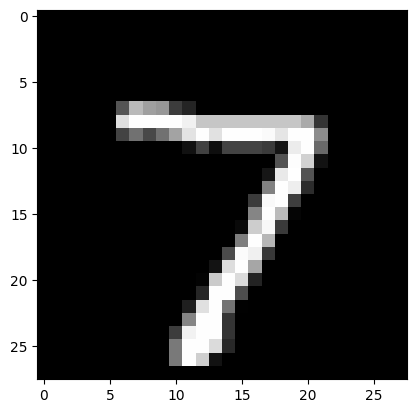

In [ ]:
image1 = x_test[0].reshape(28, 28, 1) # Note the shape is (28, 28, 1) for a single image.
image2 = x_test[1].reshape(28, 28, 1) # Note the shape is (28, 28, 1) for a single image.

# Display the first image in the test set
plt.imshow(image1[:, :, 0], cmap='gray') # change "image1" to "image2" to display the second image



To make predictions, we need to make a list of multiple images (each image of shape `(28, 28, 1)`).

In [ ]:
image_list = [image1, image2]

predicted_res = model.predict(np.array(image_list))
print(predicted_res)

# The predicted class for each image
predicted_classes = np.argmax(predicted_res, axis=1)
print("Predicted classes:", predicted_classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[1.01724987e-12 3.58457070e-10 8.92360852e-10 5.97372929e-10
  1.02565574e-10 1.03403328e-10 1.12786019e-17 1.00000000e+00
  7.23057725e-12 6.51989351e-09]
 [4.13635977e-13 6.37404296e-11 1.00000000e+00 6.11580064e-10
  4.11807903e-14 3.76659484e-16 4.34977602e-13 1.90555939e-11
  1.49775618e-13 1.28129456e-16]]
Predicted classes: [7 2]


## Remember!

what's important here is that the data sent for prediction is an array (or list) or one or multiple images, each of shape `(28, 28, 1)`.

Therefore, the shape of the input data is `(n, 28, 28, 1)` where `n` is the number of images.

# Save the model into a folder

The following cell saves the model into a folder, so that it can be loaded by `Tensorflow Serving` later.

In [ ]:
# Save the model
# Here `1` is the version number of the model.
# You can change it to any number you like, but it should be unique for each version.
model_path = "models/digit_classifier/1"

# Delete the model directory if it exists
import os
if os.path.exists(model_path):
    import shutil
    shutil.rmtree(model_path)

# Export the model
model.export(
    model_path
)

INFO:tensorflow:Assets written to: models/digit_classifier/1/assets


INFO:tensorflow:Assets written to: models/digit_classifier/1/assets


Saved artifact at 'models/digit_classifier/1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  130931784897296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  130931784898064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  130931784897680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  130931784900176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  130931784899408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  130931784901136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  130931784900560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  130931784901520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  130931784899792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  130931784902864: TensorSpec(shape=(), dtype=tf.resource, name=None)
